<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [6]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [7]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [8]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [9]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294071 entries, 0 to 294070
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            294071 non-null  int64         
 1   Referencia      294071 non-null  int64         
 2   Fecha_Fact      279594 non-null  datetime64[ns]
 3   Fecha_Apertura  294071 non-null  datetime64[ns]
 4   Cta_Cargo       289831 non-null  object        
 5   Nombre_Cliente  294070 non-null  object        
 6   Cta_Titular     294040 non-null  object        
 7   Nombre_Titular  294039 non-null  object        
 8   Recamb          294071 non-null  float64       
 9   Recamb_Pvp      294071 non-null  float64       
 10  Tiemp_Fact      294066 non-null  float64       
 11  Total_Mo        294066 non-null  float64       
 12  Modelo          292746 non-null  object        
 13  Recep           294071 non-null  object        
 14  Matricula       294071 non-null  obj

In [ ]:
"""# voy a filtrar por fecha
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-07-30")] # CAMBIO LA FECHA Y METO ESTE AÑO.""" 

In [10]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [11]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [12]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Nombre_Cliente"] = df["Nombre_Cliente"].apply(str)
df["Cta_Titular"] = df["Cta_Titular"].apply(str)
df["Nombre_Titular"] = df["Nombre_Titular"].apply(str)
df["Modelo"] = df["Modelo"].apply(str)
df["Recep"] = df["Recep"].apply(str)
df["Matricula"] = df["Matricula"].apply(str)
df["Bastidor"] = df["Bastidor"].apply(str)
df["Tipo_Or"] = df["Tipo_Or"].apply(str)


In [13]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [14]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [15]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [16]:
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("5")!=True]
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("6")!=True]

In [17]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.233271
2V O.R.CLIENT MEC VW         0.164638
7A PRESUPUESTO CH AUDI       0.134344
4A GARANTIA MECAN AUDI       0.113659
7V PRESUPUESTO CH VW         0.089115
4V GARANTIA MECAN VW         0.073885
2A O.R.CLIENT MEC AUDI-CO    0.046366
11LV O.R. MEC VW LONG DRI    0.040170
11LA O.R. MEC AU LONG DRI    0.033017
2V O.R.CLIENT MEC VW-CONT    0.029502
7LA PRES  AU CH  LONG DRI    0.005894
1A O.R.CLIENT CH AUDI        0.004626
2RA O.R.CLIENT MEC AUDI -    0.004413
12LA O.R. MEC AU VW RENTI    0.003328
2L O.R.CLIENT MEC LCV        0.003034
7LV PRES  VW CH  LONG DRI    0.003034
DG DEFER.GARANTIA AUDI       0.002949
2RV O.R.CLIENT MEC VW-CRE    0.002672
4L GARANTIA MECAN LCV        0.002183
GD DEFER.GARANTIA MECAN V    0.002030
1V O.R.CLIENT CH VW          0.001860
12LV O.R. MEC VW VW RENTI    0.001672
2L O.R.CLIENT MEC LCV-CON    0.001332
11LL O.R. MEC LCV LONG DR    0.001034
7L PRESUPUESTO CH LCV        0.001017
2RL O.R.CLIENT MEC LCV-CR    0.000272
12LL O.R. ME

In [18]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,nan,1,2015,39,768394,1760.67,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,nan,1,2015,3,770266,197.45,770266
5,1,7716492,2015-01-02,2014-12-11,116,ORDENES DE REPARACION G,117453,LOPEZ NAVARRO JOSE ANTO,0.00,0.00,0.37,26.20,A4 2.0TDI,272,5848HKH,WAUZZZ8K3DA012518,4A GARANTIA MECAN AUDI,nan,1,2015,22,771649,26.20,771649


In [19]:
df.shape

(235001, 24)

In [20]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall                 0
Referencia           0
Fecha_Fact        9736
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           5
Total_Mo             5
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           5
Orden_Corta2         0
dtype: int64

In [21]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

161408

In [22]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

51374

In [23]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    234996.000000
mean        398.698096
std         924.069513
min      -32419.720000
25%          68.440000
50%         244.210000
75%         484.760000
max       32419.720000
Name: Fact_total, dtype: float64

In [24]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(230757, 24)

In [25]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [26]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    230757.000000
mean        431.652508
std         822.552194
min           0.000000
25%          80.690000
50%         249.920000
75%         489.070000
90%         901.700000
95%        1365.074000
99%        3331.569600
max       32419.720000
Name: Fact_total, dtype: float64

In [27]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

51361

In [28]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

34

In [29]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

51361

In [30]:
df.shape # tenemos 274.898 filas

(230757, 24)

In [31]:
df.isnull().sum()

Tall                 0
Referencia           0
Fecha_Fact        9736
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           5
Total_Mo             0
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           0
Orden_Corta2         0
dtype: int64

In [32]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(230757, 24)

In [33]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [34]:
df.Bastidor.nunique() #58058 bastidores. 

50965

In [35]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221021 entries, 0 to 301828
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            221021 non-null  object        
 1   Referencia      221021 non-null  object        
 2   Fecha_Fact      221021 non-null  datetime64[ns]
 3   Fecha_Apertura  221021 non-null  datetime64[ns]
 4   Cta_Cargo       221021 non-null  object        
 5   Nombre_Cliente  221021 non-null  object        
 6   Cta_Titular     221021 non-null  object        
 7   Nombre_Titular  221021 non-null  object        
 8   Recamb          221021 non-null  float64       
 9   Recamb_Pvp      221021 non-null  float64       
 10  Tiemp_Fact      221016 non-null  float64       
 11  Total_Mo        221021 non-null  float64       
 12  Modelo          221021 non-null  object        
 13  Recep           221021 non-null  object        
 14  Matricula       221021 non-null  obj

In [36]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        5
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
dtype: int64

In [35]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [38]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578,2014,11,11,1
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578,2014,11,11,1


In [36]:
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-10-31")]
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-10-31 00:00:00


# AQUI YA METO SOLO VOLKSWAGEN

In [37]:
df_volk = df.copy()

In [38]:
"""df_audi = df_audi[df_audi["Tall"]== "1", "3", "6"]
reqd_stocks = stocks_df[(stocks_df.Sector == "Technology") & (stocks_df.Price <500)]
df_audi = df_audi[(df_audi.Tall== "1")  (df_audi.Tall== "6") or (df_audi.Tall== "3")]
df_audi = df_audi["Tall"].isin(["1", "3", "6"])"""
df_volk = df_volk.loc[(df['Tall'] == '2') | (df_volk['Tall'] == '8') | (df_volk['Tall'] == '10') ]

In [39]:
df_volk.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.0,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.6,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180,2015,1,2,4
47,2,7756811,2015-01-02,2015-01-02,127908,FERNANDEZ ALONSO BLANCA,127908,FERNANDEZ ALONSO BLANCA,83.53,187.17,0.3,19.78,GOLF,85,7854GSF,WVWZZZ1KZAW088736,2V O.R.CLIENT MEC VW,nan,1,2015,0,775681,103.31,775681,2015,1,2,4
57,2,7723141,2015-01-05,2015-01-02,35398,SAEZ JIMENEZ JAVIER,35398,SAEZ JIMENEZ JAVIER,0.00,0.00,0.0,0.00,"GOLF ""NUEV",255,1104CHZ,WVWZZZ1JZ3W458960,2V O.R.CLIENT MEC VW,nan,1,2015,3,772314,0.00,772314,2015,1,2,4
61,2,7729291,2015-01-05,2015-01-05,122901,BLANCO OLIVARES JAVIER,122901,BLANCO OLIVARES JAVIER,147.43,336.12,1.6,98.80,POLO,50,4305HFC,WVWZZZ6RZCY006813,2V O.R.CLIENT MEC VW,nan,1,2015,0,772929,246.23,772929,2015,1,5,0


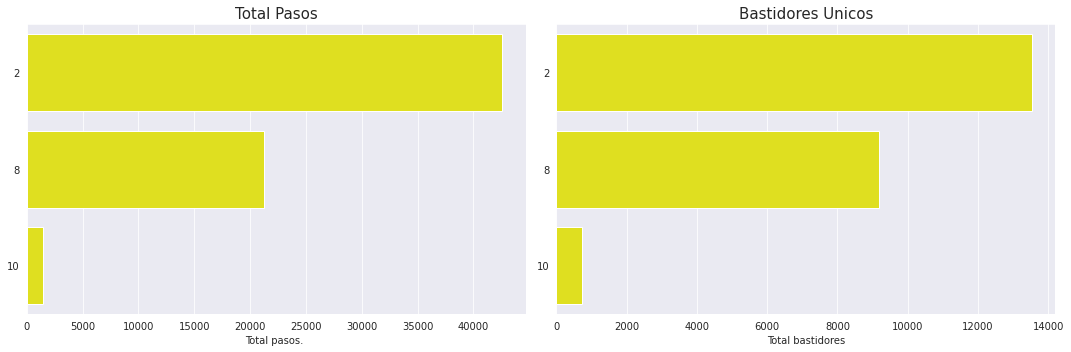

In [40]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [44]:
df_volk.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
2     13397
8      9101
10      737
Name: Bastidor, dtype: int64

In [45]:
df_volk.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
2     42124
8     21067
10     1454
Name: Orden_Corta2, dtype: int64

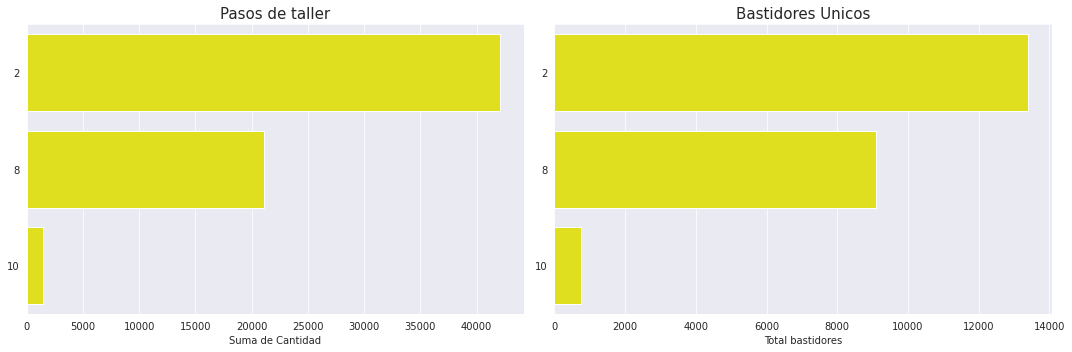

In [46]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_volk.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [ ]:
df_volk.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
2     13244
8      8937
10      715
Name: Bastidor, dtype: int64

In [ ]:
df_volk.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
2     21979878.93
8     11144503.71
10      840695.30
Name: Fact_total, dtype: float64

In [ ]:
df_volk.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    6703
2018    6606
2017    6548
2021    6485
2020    5895
2016    5398
2015    4777
2022    4609
Name: Bastidor, dtype: int64

In [ ]:
# si quiero agrupar por mas de una variable se hace así. 
df_volk.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
2     2017    4377
      2015    4217
      2018    4145
      2019    3973
      2016    3848
      2021    3786
      2020    3423
      2022    2824
8     2019    2576
      2018    2496
      2021    2462
      2017    2265
      2020    2259
      2016    1647
      2022    1583
      2015     723
10    2021     294
      2020     270
      2019     246
      2022     220
      2018      53
Name: Bastidor, dtype: int64

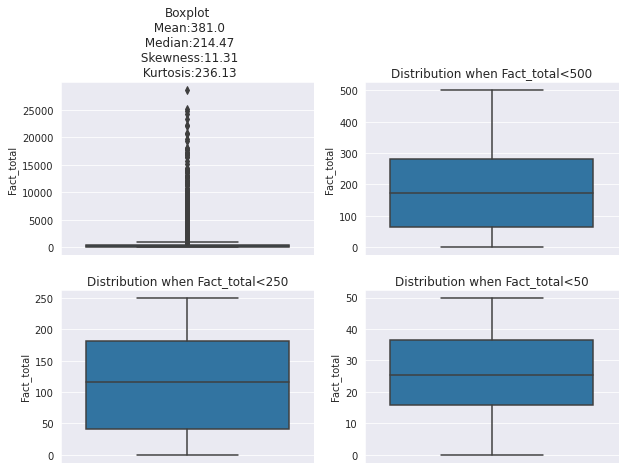

In [41]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df_volk.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df_volk.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df_volk.Fact_total),0) # calculamos la media
median = np.median(df_volk.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df_volk.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df_volk[df_volk.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df_volk[df_volk.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df_volk[df_volk.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. 

In [42]:
df_volk.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    91497.000000
mean       381.275082
std        706.424572
min          0.000000
25%         98.910000
50%        214.470000
75%        418.180000
90%        799.470000
95%       1225.128000
99%       2813.862400
max      28549.040000
Name: Fact_total, dtype: float64

In [43]:
# vamos a quitar todos los totales superiores a 5.000
df = df[df["Fact_total"]<2830]


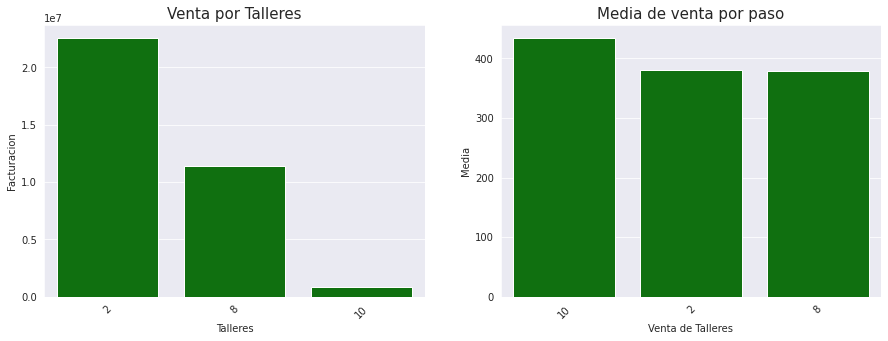

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df_volk.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df_volk.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df_volk.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df_volk.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()

In [ ]:
df_volk.Fact_total.mean() # esta es la media de todos los valores. 

380.61227212622424

In [51]:
print(df_volk[df_volk["Tall"]=="2"]["Fact_total"].mean())
print(df_volk[df_volk["Tall"]=="8"]["Fact_total"].mean())
print(df_volk[df_volk["Tall"]=="10"]["Fact_total"].mean())
"""print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())"""

380.766932228198
379.9148935316731
435.62277694982606


'print(df[df["Tall"]=="2"]["Fact_total"].mean())\nprint(df[df["Tall"]=="10"]["Fact_total"].mean())\nprint(df[df["Tall"]=="8"]["Fact_total"].mean())'

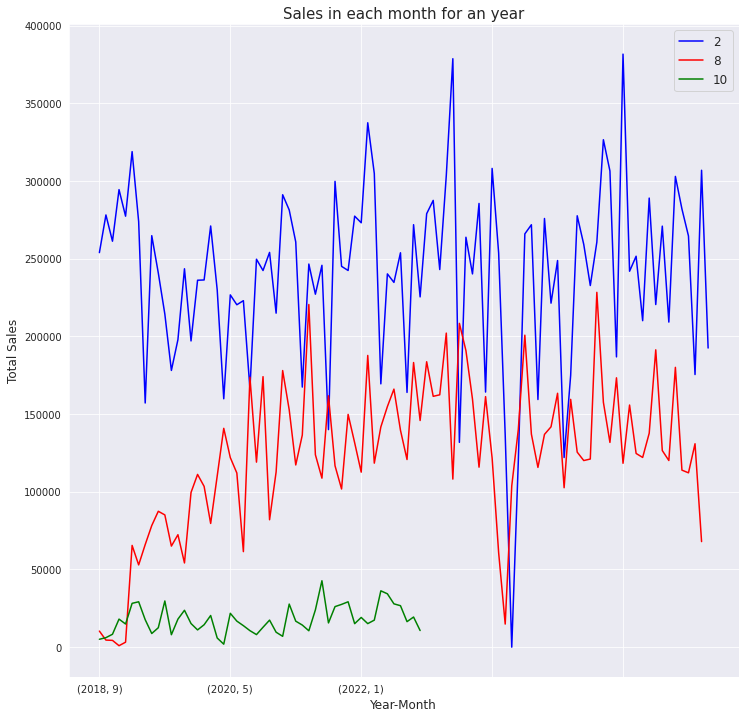

In [45]:
plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

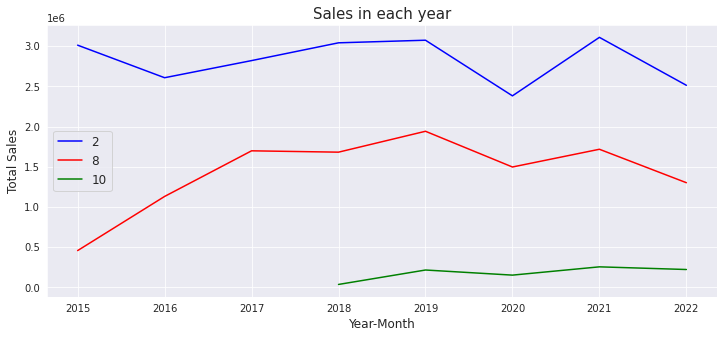

In [46]:
plt.figure(figsize=(12,5))
df_volk[df_volk['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. """

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

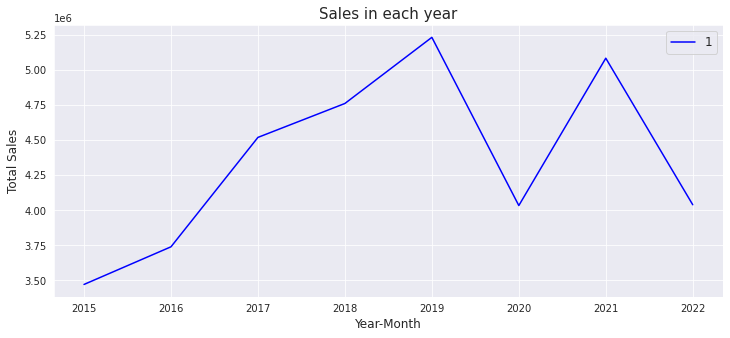

In [47]:
plt.figure(figsize=(12,5))
df_volk.groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

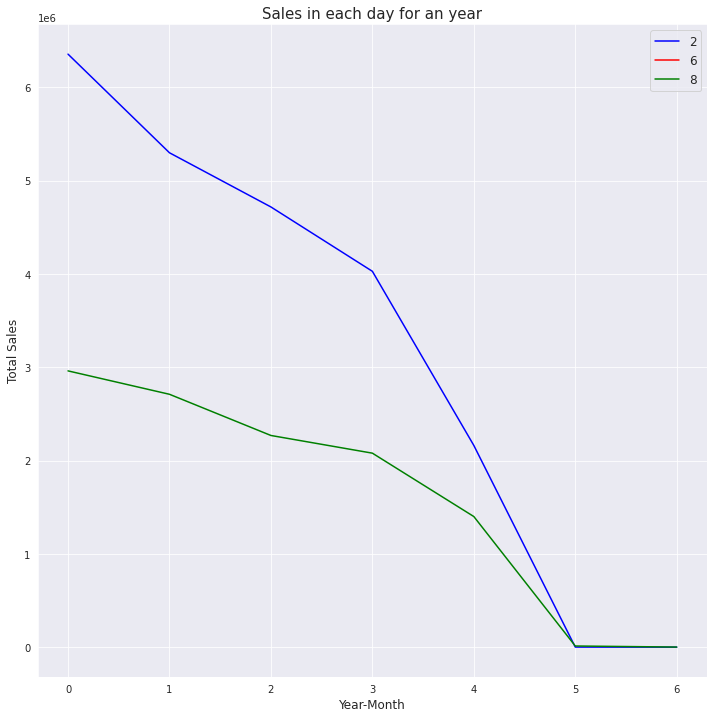

In [48]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='red')
df_volk[df_volk['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres.""" 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

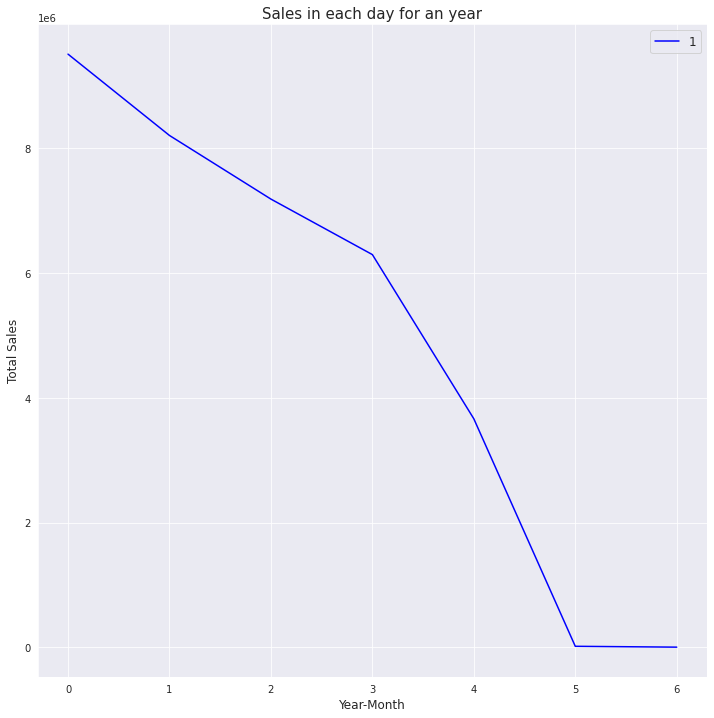

In [49]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df_volk.groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

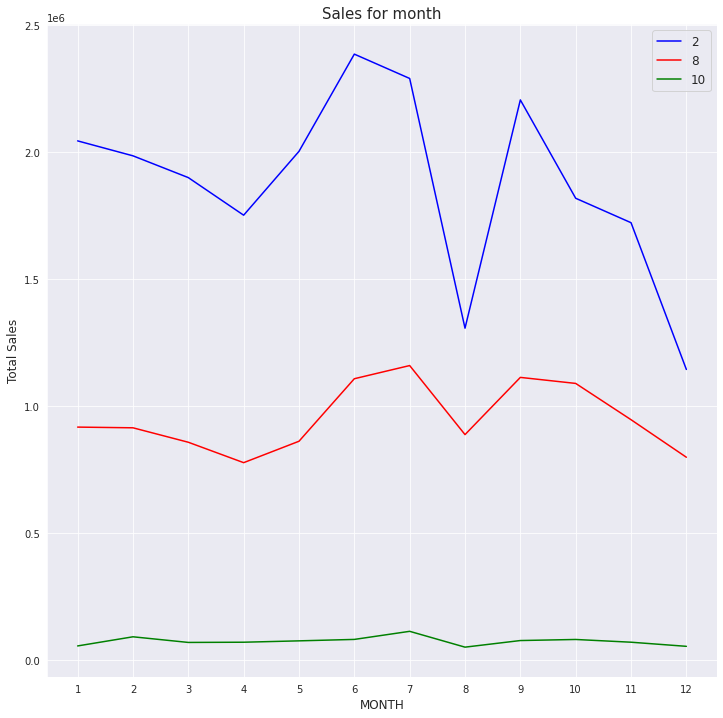

In [50]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()

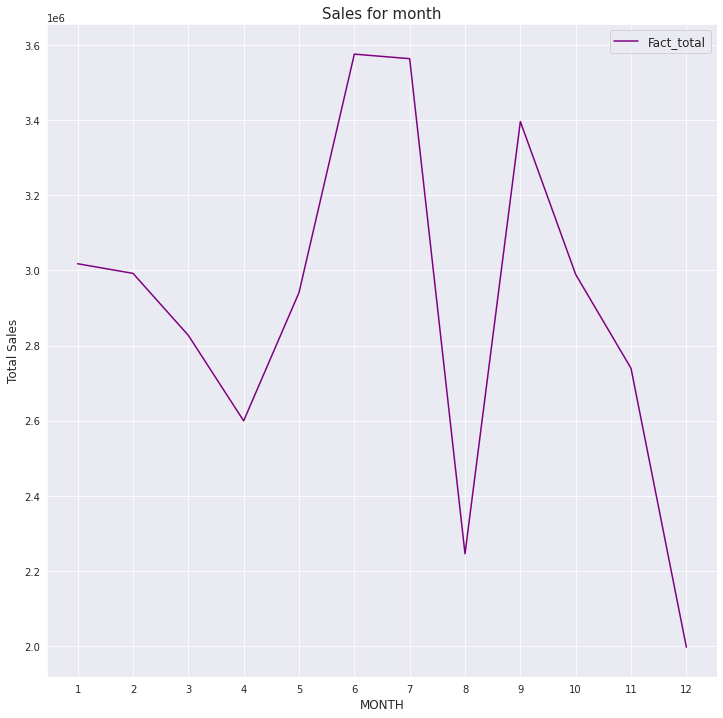

In [51]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk.groupby(['month'])['Fact_total'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

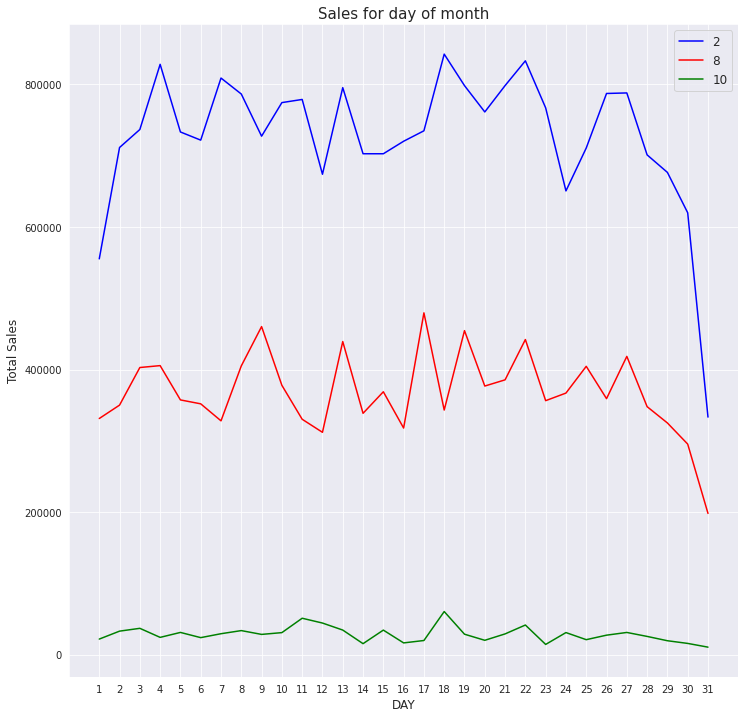

In [52]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk[df_volk['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='blue')
df_volk[df_volk['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='red')
df_volk[df_volk['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color="green")
"""df_volk[df_volk['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_volk[df_volk['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_volk[df_volk['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. """ 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

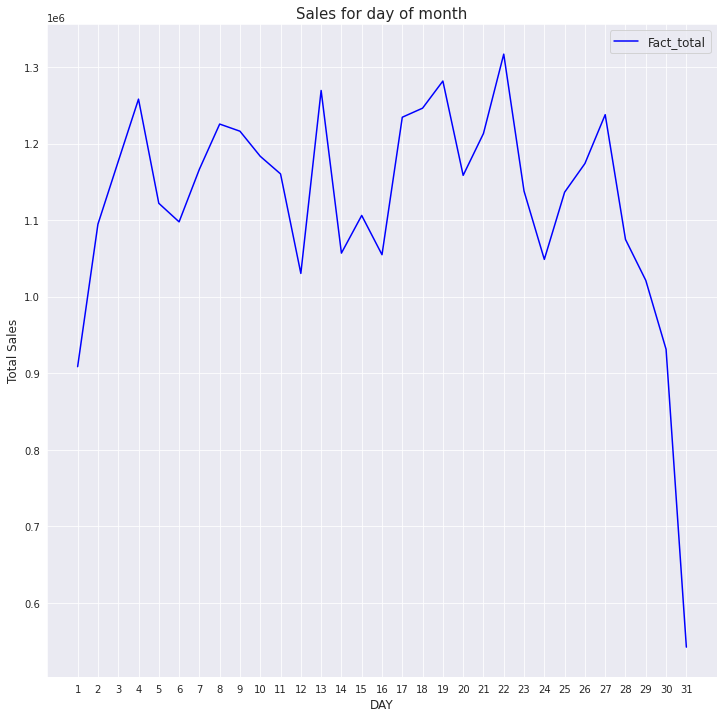

In [53]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_volk.groupby(['day'])['Fact_total'].sum().plot(kind='line',color='blue')

# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

In [54]:
df_cohort_volk = df_volk.copy()

- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [ ]:
"""# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])"""

"# creating the first variable 'Invoice Month'\n# extracting only year-month from Invoice Date and day will be 1 automatically\n\ndf_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1\n# luego en formato fecha. \n# converting the variable to datetime format\ndf_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])"

In [55]:
# voy a intentar cambiar de mes a año. 
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort_volk['InvoiceYear'] = df_cohort_volk['Fecha_Apertura'].dt.strftime("%Y") # Estamos convirtiendo tanto el mes como el día a 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort_volk['InvoiceYear'] = pd.to_datetime(df_cohort_volk['InvoiceYear'])

In [56]:
df_cohort_volk.InvoiceYear

7        2015-01-01
24       2015-01-01
47       2015-01-01
57       2015-01-01
61       2015-01-01
            ...    
301791   2022-01-01
301795   2022-01-01
301797   2022-01-01
301810   2022-01-01
301828   2022-01-01
Name: InvoiceYear, Length: 91497, dtype: datetime64[ns]

In [57]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort_volk['CohortYear'] = df_cohort_volk.groupby('Bastidor')['InvoiceYear'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort_volk['CohortYear'] = pd.to_datetime(df_cohort_volk['CohortYear'])

In [58]:
df_cohort_volk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91497 entries, 7 to 301828
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tall            91497 non-null  object        
 1   Referencia      91497 non-null  object        
 2   Fecha_Fact      91497 non-null  datetime64[ns]
 3   Fecha_Apertura  91497 non-null  datetime64[ns]
 4   Cta_Cargo       91497 non-null  object        
 5   Nombre_Cliente  91497 non-null  object        
 6   Cta_Titular     91497 non-null  object        
 7   Nombre_Titular  91497 non-null  object        
 8   Recamb          91497 non-null  float64       
 9   Recamb_Pvp      91497 non-null  float64       
 10  Tiemp_Fact      91494 non-null  float64       
 11  Total_Mo        91497 non-null  float64       
 12  Modelo          91497 non-null  object        
 13  Recep           91497 non-null  object        
 14  Matricula       91497 non-null  object        
 15  B

In [ ]:
"""# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])"""

In [59]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_Year(d1, d2):
    return((d1.dt.year - d2.dt.year))
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort_volk['CohortPeriod'] = diff_Year(df_cohort_volk['InvoiceYear'], df_cohort_volk['CohortYear'])

In [60]:
df_cohort_volk.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceYear,CohortYear,CohortPeriod
162718,2,11294911,2019-03-22,2019-03-22,4224,ANTONIO SIERRA GARCIA,4224,ANTONIO SIERRA GARCIA,55.70,129.96,1.11,51.74,GOLF,85,3587HVG,WVWZZZAUZEW205078,2V O.R.CLIENT MEC VW,nan,3,2019,0,1129491,107.44,1129491,2019,3,22,4,2019-01-01,2015-01-01,4
211314,8,12211461,2020-07-06,2020-06-01,2179,BANCO DE SANTANDER SA,2179,BANCO DE SANTANDER SA,0.00,0.00,1.50,0.00,E-GOLF 100,9,9443KYD,WVWZZZAUZK8913642,2V O.R.CLIENT MEC VW,nan,7,2020,35,1221146,0.00,1221146,2020,6,1,0,2020-01-01,2020-01-01,0
217801,8,12332602,2020-09-03,2020-07-17,2179,BANCO DE SANTANDER SA,2179,BANCO DE SANTANDER SA,239.83,521.98,0.70,43.43,POLO ADVAN,50,4827KFD,WVWZZZ6RZHY296862,2A O.R.CLIENT MEC AUDI,nan,9,2020,48,1233260,283.26,1233260,2020,7,17,4,2020-01-01,2018-01-01,2
215369,8,12305771,2020-08-11,2020-07-13,116W,ORDENES DE REPARACION G,152763,JUAREZ SAEZ RAMON,88.14,203.20,1.96,123.53,BEETLE CAB,50,2937KSX,WVWZZZ16ZJM515504,4V GARANTIA MECAN VW,nan,8,2020,29,1230577,211.67,1230577,2020,7,13,0,2020-01-01,2018-01-01,2
249027,2,13043461,2021-06-24,2021-06-22,2291,VOLKSWAGEN RENTING SA,2291,VOLKSWAGEN RENTING SA,188.34,377.74,1.05,43.69,TOURAN 1.6,85,1969JZY,WVGZZZ1TZHW079906,12LV O.R. MEC VW VW RENTI,nan,6,2021,2,1304346,232.03,1304346,2021,6,22,1,2021-01-01,2017-01-01,4


In [61]:
customer_cohort_volk = df_cohort_volk.pivot_table(index='CohortYear', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort_volk
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,4777.0,2302.0,2284.0,1614.0,1370.0,944.0,901.0,694.0
2016-01-01,3096.0,1397.0,1286.0,835.0,670.0,511.0,446.0,NaN
2017-01-01,2867.0,1057.0,927.0,646.0,531.0,364.0,NaN,NaN
2018-01-01,2649.0,1098.0,881.0,649.0,476.0,NaN,NaN,NaN
2019-01-01,2473.0,1005.0,972.0,644.0,NaN,NaN,NaN,NaN
2020-01-01,1749.0,728.0,573.0,NaN,NaN,NaN,NaN,NaN
2021-01-01,2193.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,1835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por año
        - por ejemplo 8859 del 2016 son los nuevos clientes diferentes de la primera fecha que es el 2015. al siguiente año fueron 7419 nuevos diferentes a abril del 2015 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo de los 13975 clientes dem 2015 el siguiente año repiten 6630 en el año 2 repiten 6624 y asi sucesivamente.  

In [62]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort_volk.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort_volk.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7
2015-01-01,100.0,48.2,47.8,33.8,28.7,19.8,18.9,14.5
2016-01-01,100.0,45.1,41.5,27.0,21.6,16.5,14.4,NaN
2017-01-01,100.0,36.9,32.3,22.5,18.5,12.7,NaN,NaN
2018-01-01,100.0,41.4,33.3,24.5,18.0,NaN,NaN,NaN
2019-01-01,100.0,40.6,39.3,26.0,NaN,NaN,NaN,NaN
2020-01-01,100.0,41.6,32.8,NaN,NaN,NaN,NaN,NaN
2021-01-01,100.0,37.2,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


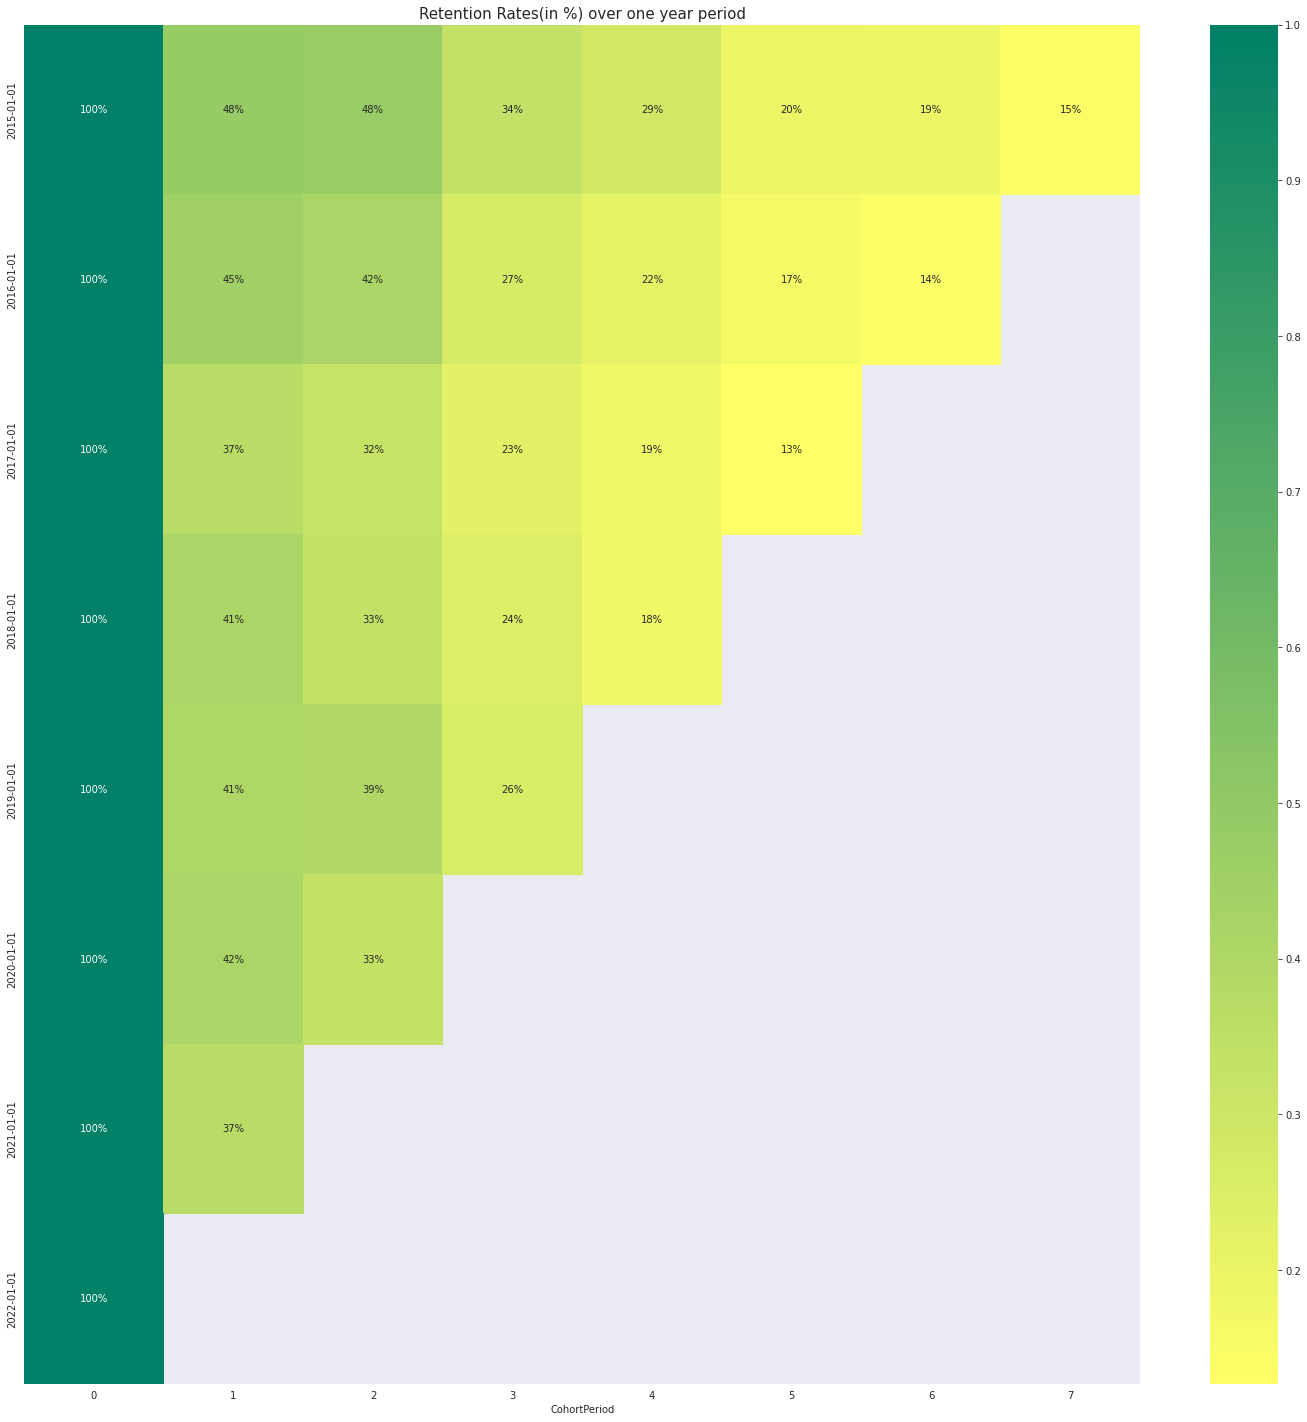

In [63]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(25, 25))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [64]:
amount_cohort_volk = df_cohort_volk.pivot_table(index='CohortYear', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort_volk
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,395.29,364.58,357.28,414.68,496.59,496.55,555.01,571.67
2016-01-01,360.13,281.53,341.71,380.08,414.78,482.79,551.70,NaN
2017-01-01,360.57,315.35,331.31,303.75,422.15,439.83,NaN,NaN
2018-01-01,337.06,299.79,320.17,359.93,429.11,NaN,NaN,NaN
2019-01-01,353.89,303.63,381.11,416.46,NaN,NaN,NaN,NaN
2020-01-01,416.19,419.25,379.99,NaN,NaN,NaN,NaN,NaN
2021-01-01,429.53,347.88,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,417.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM ANALISIS

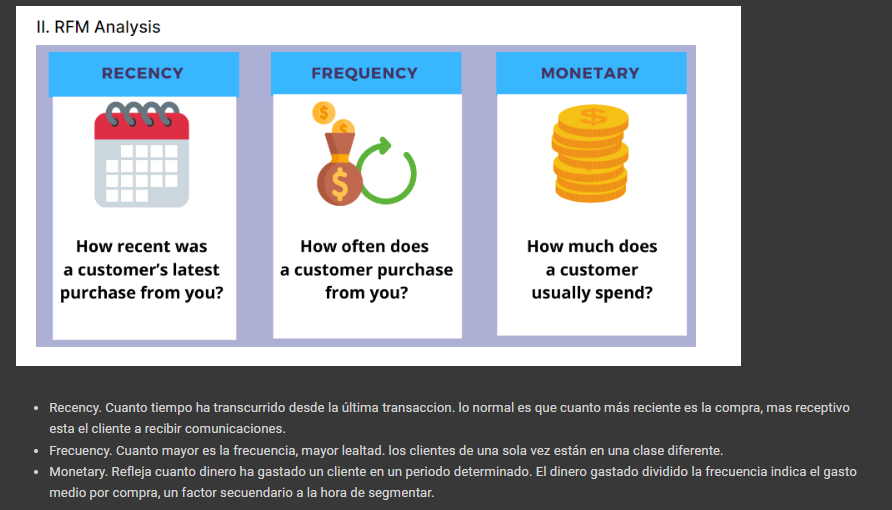

In [65]:
df_rfm_volk = df_volk.copy() # hacemos la copia del original. 

In [66]:
print("la fecha va desde {} a {}".format(df_rfm_volk.Fecha_Apertura.min(), df_rfm_volk.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-10-31 00:00:00


In [67]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm_volk.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WVWZZZ3CZ6E13699,2126
1,0JHCL75406C200346,736
2,1C8GYN2735Y513409,848
3,1HZWW176663,2793
4,3VV4B7AX4JM004729,85


In [68]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm_volk.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WVWZZZ3CZ6E13699,1
1,0JHCL75406C200346,2
2,1C8GYN2735Y513409,1
3,1HZWW176663,1
4,3VV4B7AX4JM004729,1


In [69]:
frequency.isnull().sum()

fBastidor    0
frequency    0
dtype: int64

In [70]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm_volk.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WVWZZZ3CZ6E13699,826.76
1,0JHCL75406C200346,327.40
2,1C8GYN2735Y513409,49.55
3,1HZWW176663,556.91
4,3VV4B7AX4JM004729,82.64


In [71]:
# combining the three into one table

rfm_volk = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm_volk.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm_volk.head(10)

,Bastidor,recency,frequency,monetary
0,WVWZZZ3CZ6E13699,2126,1,826.76
1,0JHCL75406C200346,736,2,327.40
2,1C8GYN2735Y513409,848,1,49.55
3,1HZWW176663,2793,1,556.91
4,3VV4B7AX4JM004729,85,1,82.64
5,3VW447AU0GM018597,575,1,1099.88
6,3VWBA21C1XM408876,2595,1,559.92
7,3VWED21C62M409518,455,8,2723.48
8,3VWLF6AJ8CM457367,2541,1,94.99
9,3VWRV49M24M065602,740,1,202.45


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [72]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm_volk.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm_volk[df_rfm_volk['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm_volk.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sBastidor,sov
0,WVWZZZ3CZ6E13699,0.0
1,0JHCL75406C200346,0.0
2,1C8GYN2735Y513409,0.0
3,1HZWW176663,0.0
4,3VV4B7AX4JM004729,0.0


In [ ]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit.csv")

In [ ]:
df_rfm_volk.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# checking the overall highlights. The number of distinct customers are 4334
rfm_volk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21166 entries, 0 to 21165
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   21166 non-null  object 
 1   recency    21166 non-null  int64  
 2   frequency  21166 non-null  int64  
 3   monetary   21166 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 661.6+ KB


In [73]:
# combining the three into one table

rfm_volk = pd.concat([recency,frequency,monetary,speed_of_visit], axis=1) # este es el nombre de cada dataframe
rfm_volk.drop(['fBastidor',"mBastidor", "sBastidor"], axis=1, inplace=True)
rfm_volk.head(100)

,Bastidor,recency,frequency,monetary,sov
0,WVWZZZ3CZ6E13699,2126,1,826.76,0.0
1,0JHCL75406C200346,736,2,327.40,0.0
2,1C8GYN2735Y513409,848,1,49.55,0.0
3,1HZWW176663,2793,1,556.91,0.0
4,3VV4B7AX4JM004729,85,1,82.64,0.0
...,...,...,...,...,...
95,VF34C9HXC55206369,825,1,167.39,0.0
96,VF37AVUZT32692418,2023,1,216.57,0.0
97,VF3CUHNZTGY067733,484,1,1979.12,0.0
98,VF3L35GNHGS292183,1763,1,547.61,0.0


In [74]:
# checking the summary
rfm_volk.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary,sov
count,21639.000000,21639.000000,21639.000000,21639.000000
mean,1072.839734,3.019178,1612.159814,85.448450
std,842.556110,2.713812,2530.087885,152.952422
min,1.000000,1.000000,0.000000,0.000000
25%,274.000000,1.000000,272.860000,0.000000
50%,930.000000,2.000000,780.870000,0.000000
75%,1786.000000,4.000000,1963.195000,161.000000
90%,2308.000000,7.000000,3987.300000,322.000000
95%,2583.000000,9.000000,5740.522000,405.000000
99%,2804.000000,13.000000,11080.301400,611.000000


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.


In [75]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm_volk['recency_score'] = pd.cut(rfm_volk['recency'], bins=[0,290,720,1080,2208,2860], labels=[10,8,6,-2,-15]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm_volk['recency_score'] = rfm_volk['recency_score'].astype('float')
rfm_volk['frequency_score'] = pd.cut(rfm_volk['frequency'], bins=[0,1,2,4,7,29], labels=[1,2,3,8,10])
# hacemos los cortes por los estadísticos de arriba. 
rfm_volk['frequency_score'] = rfm_volk['frequency_score'].astype('float')
rfm_volk['monetary_score'] = pd.cut(rfm_volk['monetary'], bins=[-1,269,777,1944,3927,70000], labels=[1,2,3,4,5])
# igual que los anteriores. 
rfm_volk['monetary_score'] = rfm_volk['monetary_score'].astype('float')

rfm_volk['sov_score'] = pd.cut(rfm_volk['sov'], bins=[-1,50,315,780,810,943], labels=[1,6,5,2,0]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm_volk['sov_score'] = rfm_volk['sov_score'].astype('float')

In [76]:
rfm_volk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21639 entries, 0 to 21638
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bastidor         21639 non-null  object 
 1   recency          21639 non-null  int64  
 2   frequency        21639 non-null  int64  
 3   monetary         21639 non-null  float64
 4   sov              21639 non-null  float64
 5   recency_score    21639 non-null  float64
 6   frequency_score  21639 non-null  float64
 7   monetary_score   21639 non-null  float64
 8   sov_score        21639 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.5+ MB


In [77]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score']) + (x["sov_score"])
# esta función suma los tres valores. 
rfm_volk['score'] = rfm_volk.apply(score_rfm,axis=1 ) # añadimos la variable score al dataframe. 
rfm_volk.head()

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
0,WVWZZZ3CZ6E13699,2126,1,826.76,0.0,-2.0,1.0,3.0,1.0,3.0
1,0JHCL75406C200346,736,2,327.40,0.0,6.0,2.0,2.0,1.0,11.0
2,1C8GYN2735Y513409,848,1,49.55,0.0,6.0,1.0,1.0,1.0,9.0
3,1HZWW176663,2793,1,556.91,0.0,-15.0,1.0,2.0,1.0,-11.0
4,3VV4B7AX4JM004729,85,1,82.64,0.0,10.0,1.0,1.0,1.0,13.0


In [78]:
rfm_volk.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    21639.000000
mean        10.285965
std         11.428338
min        -12.000000
25%          2.000000
50%         12.000000
75%         17.000000
90%         27.000000
95%         29.000000
99%         31.000000
max         31.000000
Name: score, dtype: float64

In [79]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways
# se puede hacer de muchas maneras pero vamos a hacer los cortes por los estadísticos. 

rfm_volk['customer_type'] = pd.cut(rfm_volk['score'], bins=[-3,7,12,17,25,32], labels=["CAT5","CAT4","CAT3","CAT2","CAT1"])
rfm_volk.sample(10)

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score,customer_type
11156,WVWZZZ3CZAE526234,2279,1,109.97,0.0,-15.0,1.0,1.0,1.0,-12.0,NaN
7044,WVWZZZ1HZVW263010,532,1,390.87,0.0,8.0,1.0,2.0,1.0,12.0,CAT4
6254,WVGZZZCRZLD029984,812,1,183.43,0.0,6.0,1.0,1.0,1.0,9.0,CAT4
20977,WVWZZZAWZKY061081,732,1,188.92,0.0,6.0,1.0,1.0,1.0,9.0,CAT4
2874,WVGZZZ5NZDW621340,546,8,3801.45,358.0,8.0,10.0,4.0,5.0,27.0,CAT1
15288,WVWZZZ6RZGY185151,1604,3,304.38,0.0,-2.0,3.0,2.0,1.0,4.0,CAT5
1428,WVGZZZ1TZBW080138,1812,2,91.03,0.0,-2.0,2.0,1.0,1.0,2.0,CAT5
7338,WVWZZZ1JZ3W458960,2860,1,0.00,0.0,-15.0,1.0,1.0,1.0,-12.0,NaN
11265,WVWZZZ3CZAP044887,210,5,2194.06,556.0,10.0,8.0,4.0,5.0,27.0,CAT1
19607,WVWZZZAUZJW093268,1708,1,237.11,0.0,-2.0,1.0,1.0,1.0,1.0,CAT5


In [80]:
rfm_volk.isnull().sum()

Bastidor              0
recency               0
frequency             0
monetary              0
sov                   0
recency_score         0
frequency_score       0
monetary_score        0
sov_score             0
score                 0
customer_type      2587
dtype: int64

In [81]:
rfm_volk.describe()

,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
count,21639.000000,21639.000000,21639.000000,21639.000000,21639.000000,21639.000000,21639.000000,21639.000000,21639.000000
mean,1072.839734,3.019178,1612.159814,85.448450,2.123850,3.228476,2.609501,2.324137,10.285965
std,842.556110,2.713812,2530.087885,152.952422,8.087503,2.985348,1.283976,2.111357,11.428338
min,1.000000,1.000000,0.000000,0.000000,-15.000000,1.000000,1.000000,0.000000,-12.000000
25%,274.000000,1.000000,272.860000,0.000000,-2.000000,1.000000,2.000000,1.000000,2.000000
50%,930.000000,2.000000,780.870000,0.000000,6.000000,2.000000,3.000000,1.000000,12.000000
75%,1786.000000,4.000000,1963.195000,161.000000,10.000000,3.000000,4.000000,5.000000,17.000000
max,2860.000000,28.000000,69603.540000,943.000000,10.000000,10.000000,5.000000,6.000000,31.000000


In [82]:
rfm_volk.to_excel("/content/drive/MyDrive/Colab Notebooks/RFM_VOLKS.xlsx", index=False)

In [83]:
round(rfm_volk.customer_type.value_counts(normalize=True)*100,0)

CAT5    31.0
CAT3    28.0
CAT1    15.0
CAT4    15.0
CAT2    11.0
Name: customer_type, dtype: float64

- podemos ver el 9% son platinum, que combinados con los gold suman el 24%. estos son los mejores clientes. 
- los silver son aquellos en los que podemos enfocarnos para convertirlos en gold o platinum. 
- los bad son aquellos que no están comprometidos con el negocio y no ponen mucho esfuerzo por venir. 

In [84]:
# looking the RFM value for each of the category
rfm_volk.groupby('customer_type')['recency','frequency','monetary', "sov"].mean().round(0)

,recency,frequency,monetary,sov
customer_type,,,,
CAT5,1672.0,2.0,870.0,1.0
CAT4,835.0,2.0,701.0,46.0
CAT3,468.0,2.0,1338.0,43.0
CAT2,538.0,5.0,2737.0,323.0
CAT1,242.0,8.0,4585.0,285.0


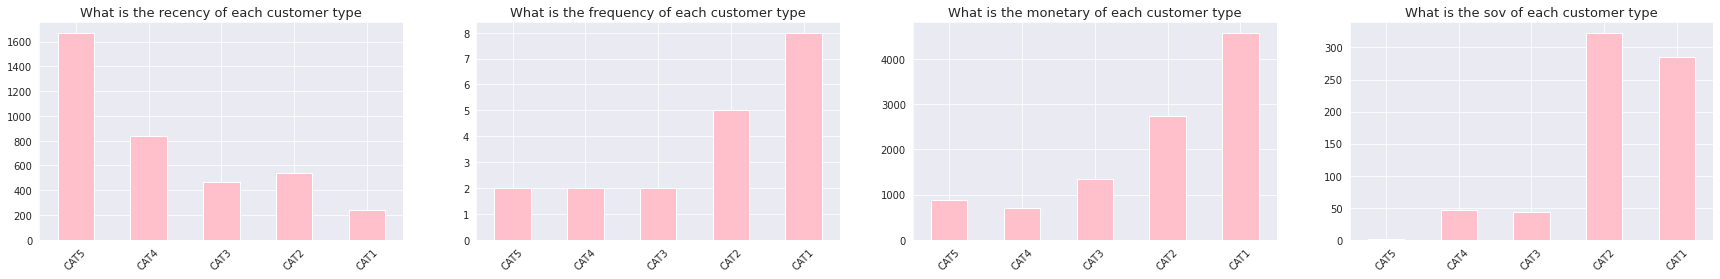

In [85]:
column = ['recency','frequency','monetary', "sov"]
plt.figure(figsize=(30,4))
for i,j in enumerate(column):
    plt.subplot(1,4,i+1)
    rfm_volk.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='pink')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

## K-MEANS CLUSTERING

In [ ]:
# copying the data into new variable
df_kmeans = rfm_volk.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,Bastidor,recency,frequency,monetary
0,WVWZZZ3CZ6E13699,2002,1,826.76
1,0JHCL75406C200346,612,2,327.40
2,1C8GYN2735Y513409,724,1,49.55
3,1HZWW176663,2669,1,556.91
4,3VW447AU0GM018597,451,1,1099.88


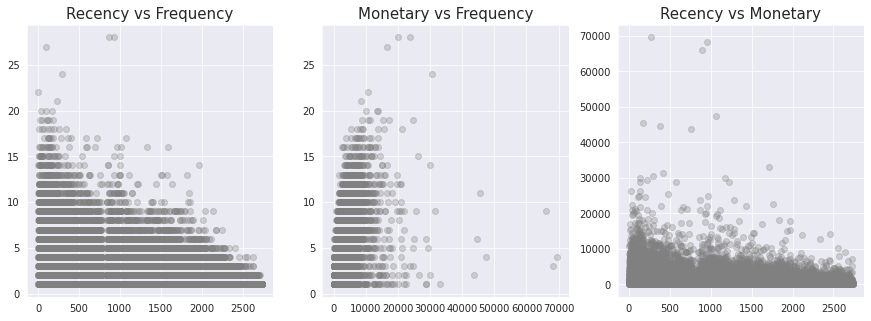

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) # UNA FILA, TRES GRAFICOS POR FILA, Y LO HACEMOS EN LA PRIMERA. 
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3) # en este primero metemos el kmeans de recency y frecuenciy 
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3) # en este segundo metemos monetary y frecuency
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3) # en el tercero recency vs monetary
plt.title('Recency vs Monetary', size=15)
plt.show()

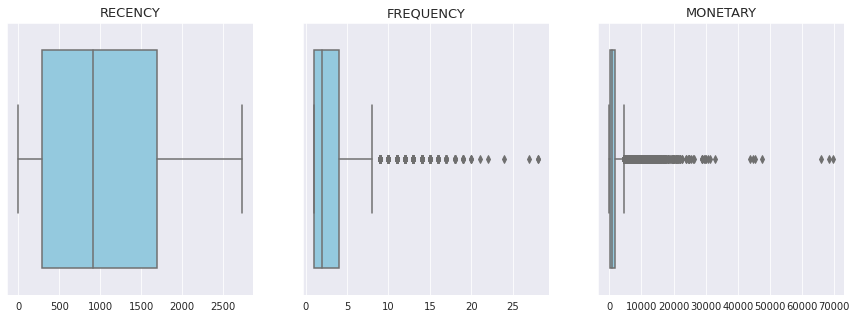

In [ ]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [ ]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20667 entries, 0 to 20666
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   20667 non-null  object 
 1   recency    20667 non-null  int64  
 2   frequency  20667 non-null  int64  
 3   monetary   20667 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 646.0+ KB


In [ ]:
# looking at random 5 rows
df_kmeans.sample(5)

,Bastidor,recency,frequency,monetary
19740,WVWZZZAWZJY021505,1213,4,1459.58
8470,WVWZZZ1KZAW322257,1294,5,2805.54
13551,WVWZZZ6RZBY012577,1870,3,4176.58
7568,WVWZZZ1KZ7M049511,926,2,1322.61
6198,WVWZZZ13ZHV000220,213,8,2302.29


In [ ]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,1.214652,-0.757940,-0.345678
1,-0.529921,-0.370439,-0.609783
2,-0.389351,-0.757940,-0.756734
3,2.051796,-0.757940,-0.488398
4,-0.731991,-0.757940,-0.201228


- inicialmente sin ningún conocimiento estamos clusterizando los datos en 5 clusters. La unica intuición que tenemos es RFM, con lo cual categorizamos en 5.
- mas tarde veremos más metodos para optimizar el valor de K

In [ ]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [ ]:
# checking the labels
model_clus5.labels_

array([0, 1, 1, ..., 4, 2, 4], dtype=int32)

In [ ]:
df_kmeans['clusters'] = model_clus5.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,2002,1,826.76,0
1,612,2,327.40,1
2,724,1,49.55,1
3,2669,1,556.91,0
4,451,1,1099.88,1


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,2195.0,2.0,716.0
1,320.0,2.0,711.0
2,443.0,9.0,6890.0
3,593.0,6.0,2785.0
4,1329.0,2.0,727.0


- METODO DEL CODO

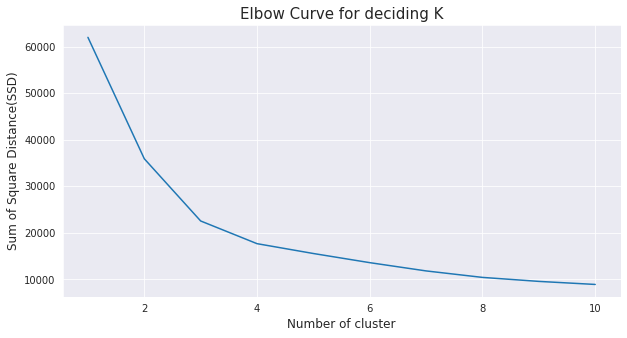

In [ ]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [ ]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4750736973128901
For n_clusters=3, the silhouette score is 0.4236094135064675
For n_clusters=4, the silhouette score is 0.4187136907071541
For n_clusters=5, the silhouette score is 0.34551794494458904
For n_clusters=6, the silhouette score is 0.3452394132744101
For n_clusters=7, the silhouette score is 0.3587961154796312
For n_clusters=8, the silhouette score is 0.36731838979211584
For n_clusters=9, the silhouette score is 0.35386169662362316
For n_clusters=10, the silhouette score is 0.3547817842660731


In [ ]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [ ]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,2002,1,826.76,2
1,612,2,327.40,0
2,724,1,49.55,0
3,2669,1,556.91,2
4,451,1,1099.88,0


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,462.0,2.0,944.0
1,541.0,7.0,4723.0
2,1880.0,2.0,746.0


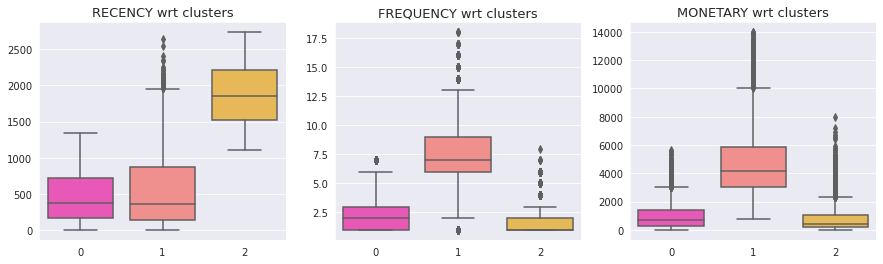

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

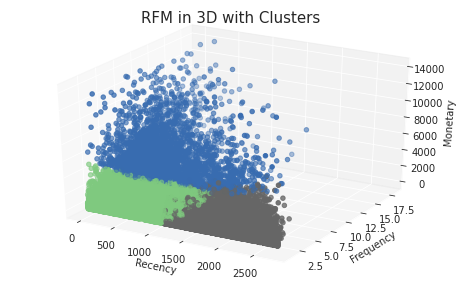

In [ ]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()